# Import Packages

In [ ]:
!pip install seaborn wordcloud
!pip install --upgrade wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # We use regular expressions for data cleaning
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import jaccard_score
from nltk.metrics import edit_distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Exploratory Data Analysis

**1. Data Overview**


We'll start by examining the basic structure of the dataset, exploring the first few rows to get a sense of the data.

In [ ]:
Quora = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')
Quora

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket programming language of the latest version?,How many keywords are there in PERL Programming Language in the latest version?,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,"What is the approx annual cost of living while studying in UIC Chicago, for an Indian student?","I am having little hairfall problem but I want to use hair styling product. Which one should I prefer out of gel, wax and clay?",0


In [ ]:
print(Quora.isna().sum())
Quora.dropna(inplace=True)
Quora

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket programming language of the latest version?,How many keywords are there in PERL Programming Language in the latest version?,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,"What is the approx annual cost of living while studying in UIC Chicago, for an Indian student?","I am having little hairfall problem but I want to use hair styling product. Which one should I prefer out of gel, wax and clay?",0


- The Quora dataset comprises 404,289 rows and six columns, providing a rich source of information for natural language processing tasks
- This huge dataset is particularly useful for tasks related to duplicate question identification, making it valuable for exploring natural language processing techniques and machine learning models.

**2. Data Distribution**

<Axes: xlabel='is_duplicate'>

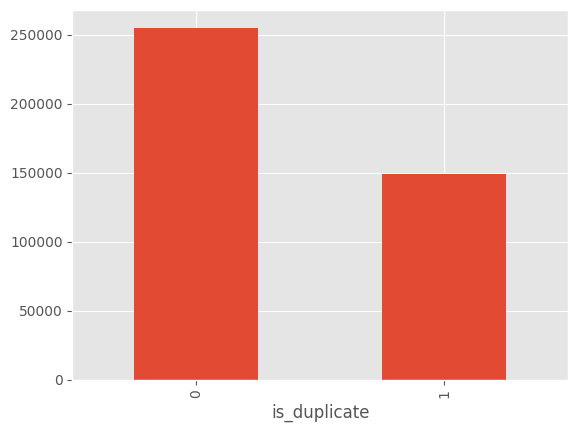

In [ ]:
Quora.groupby('is_duplicate')['id'].count().plot.bar()

In [ ]:
n_similar = Quora['is_duplicate'].sum()
print(f'Number of duplicate question pairs: {n_similar} ({(n_similar/Quora.shape[0])*100}%)')
print(f'Number of non duplicate question pairs: {Quora.shape[0]-n_similar} ({100-(n_similar/Quora.shape[0])*100}%)')

Number of duplicate question pairs: 149263 (36.92005926482919%)
Number of non duplicate question pairs: 255024 (63.07994073517081%)


- The data is well balanced, with a percentage of 64% of non-duplicate questions and 36% of duplicate ones.

In [ ]:
# Number of unique questions
qids = pd.Series(Quora['qid1'].tolist() + Quora['qid2'].tolist())
unique_ques = len(np.unique(qids))
ques_freq_morethan_one = np.sum(qids.value_counts() > 1)
max_freq = max(qids.value_counts())

print(f'Number of unique questions are: {unique_ques}')
print(f'Number of questions appearning more than once: {ques_freq_morethan_one} ({ques_freq_morethan_one/unique_ques*100}%)')
print(f'Max number of times a question appears: {max_freq}')

Number of unique questions are: 537929
Number of questions appearning more than once: 111778 (20.779322178205675%)
Max number of times a question appears: 157


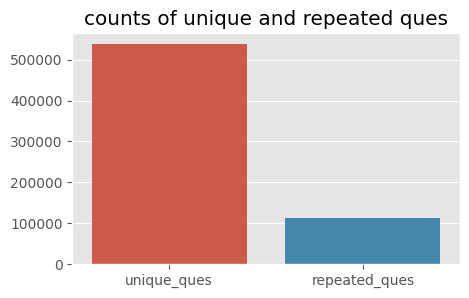

In [ ]:
x = ['unique_ques','repeated_ques']
y = [unique_ques,ques_freq_morethan_one]

fig = plt.figure(figsize=(5,3))
plt.title('counts of unique and repeated ques')
sns.barplot(x=x,y=y)
plt.show()

In [ ]:
# Checking for duplicate entries
duplicate_pairs = Quora[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print(f'Number of duplicate entries: {duplicate_pairs.shape[0] - Quora.shape[0]}')

Number of duplicate entries: 0


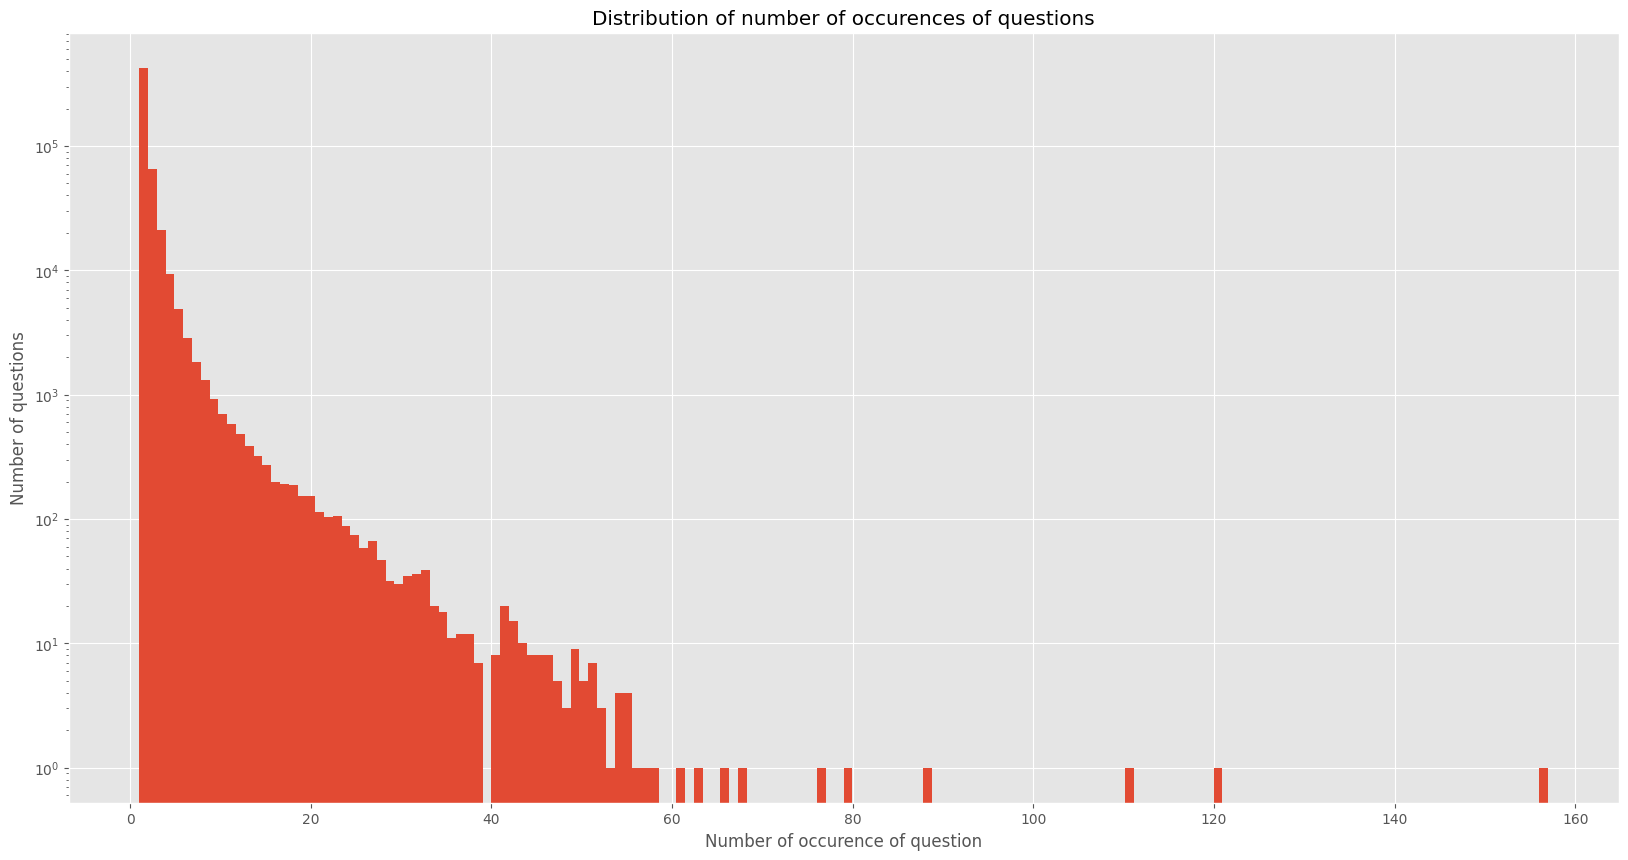

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.hist(qids.value_counts(),bins=160)
plt.yscale('log')
plt.title('Distribution of number of occurences of questions')
plt.xlabel('Number of occurence of question')
plt.ylabel('Number of questions')
plt.show()

**3. Test Analysis**

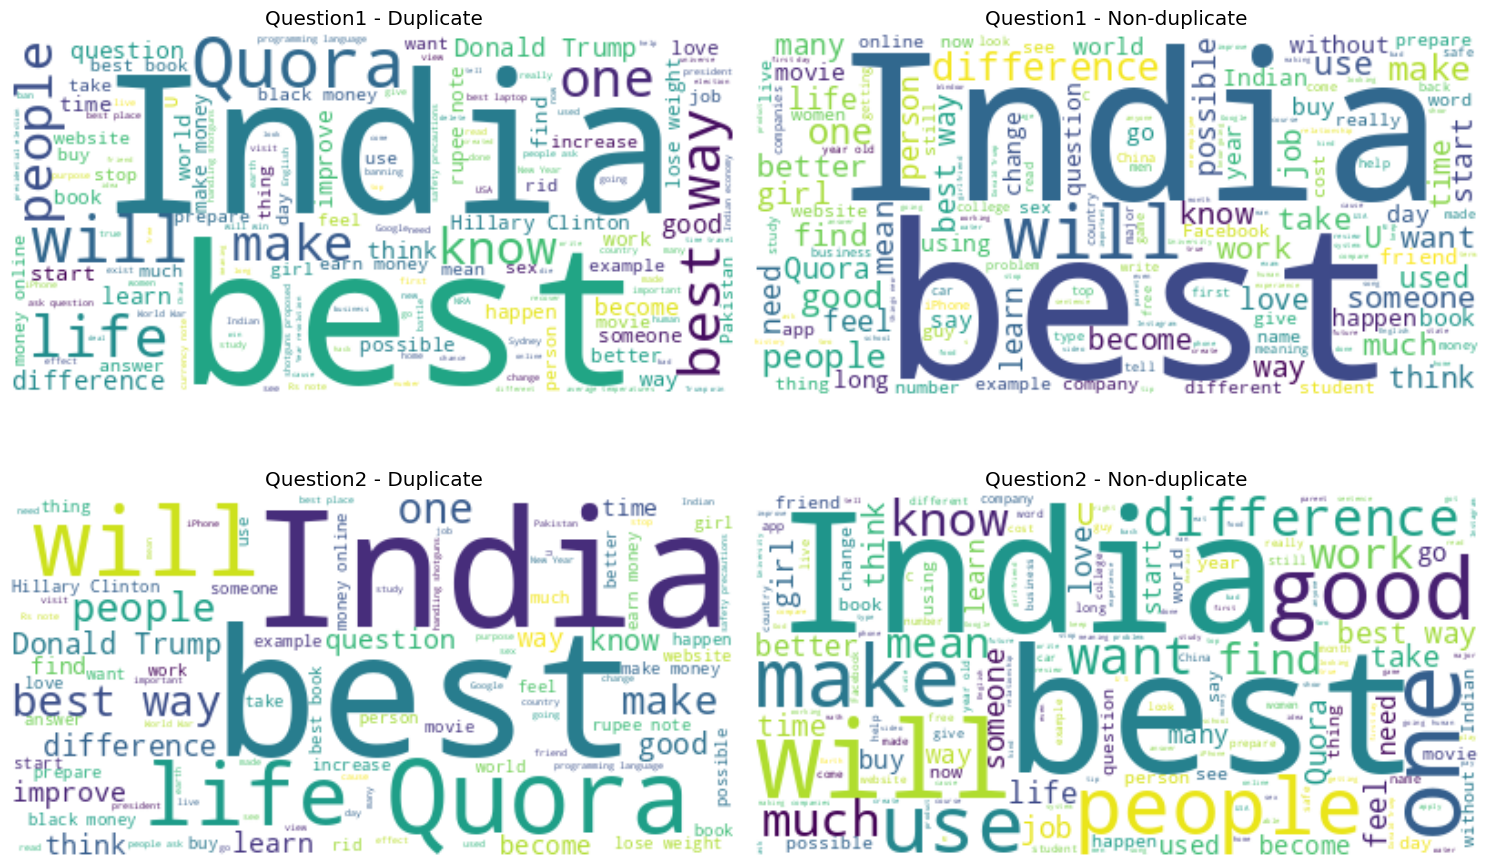

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and plot word clouds
def generate_wordcloud(data_q1_duplicate, data_q1_non_duplicate, data_q2_duplicate, data_q2_non_duplicate):
    # Generate word clouds for question1 and question2
    wordcloud_q1_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q1_duplicate.astype(str)))
    wordcloud_q1_non_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q1_non_duplicate.astype(str)))
    wordcloud_q2_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q2_duplicate.astype(str)))
    wordcloud_q2_non_duplicate = WordCloud(width=400, height=200, background_color='white').generate(' '.join(data_q2_non_duplicate.astype(str)))

    # Plot the Word Clouds in a 2x2 subplot
    plt.figure(figsize=(15, 10))

    # Plot for question1 and is_duplicate = 1
    plt.subplot(2, 2, 1)
    plt.imshow(wordcloud_q1_duplicate, interpolation='bilinear')
    plt.title('Question1 - Duplicate')
    plt.axis('off')

    # Plot for question1 and is_duplicate = 0
    plt.subplot(2, 2, 2)
    plt.imshow(wordcloud_q1_non_duplicate, interpolation='bilinear')
    plt.title('Question1 - Non-duplicate')
    plt.axis('off')

    # Plot for question2 and is_duplicate = 1
    plt.subplot(2, 2, 3)
    plt.imshow(wordcloud_q2_duplicate, interpolation='bilinear')
    plt.title('Question2 - Duplicate')
    plt.axis('off')

    # Plot for question2 and is_duplicate = 0
    plt.subplot(2, 2, 4)
    plt.imshow(wordcloud_q2_non_duplicate, interpolation='bilinear')
    plt.title('Question2 - Non-duplicate')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Separate data for duplicate and non-duplicate questions
duplicate_data_q1 = Quora[Quora['is_duplicate'] == 1]['question1']
non_duplicate_data_q1 = Quora[Quora['is_duplicate'] == 0]['question1']
duplicate_data_q2 = Quora[Quora['is_duplicate'] == 1]['question2']
non_duplicate_data_q2 = Quora[Quora['is_duplicate'] == 0]['question2']

# Generate and plot word clouds for 'question1' and 'question2'
generate_wordcloud(duplicate_data_q1, non_duplicate_data_q1, duplicate_data_q2, non_duplicate_data_q2)

- A lot of similarities in the vocabulary used in the two questions. The most common vocabulary terms contain the words: India, Best,Best ,Quora ,Will ,Question ,difference Donald Trump, and Life.
- The jargon remains the same as we analyze the duplicates and non-duplicates (over the column line).
- our text seems clean and doesn't need processing

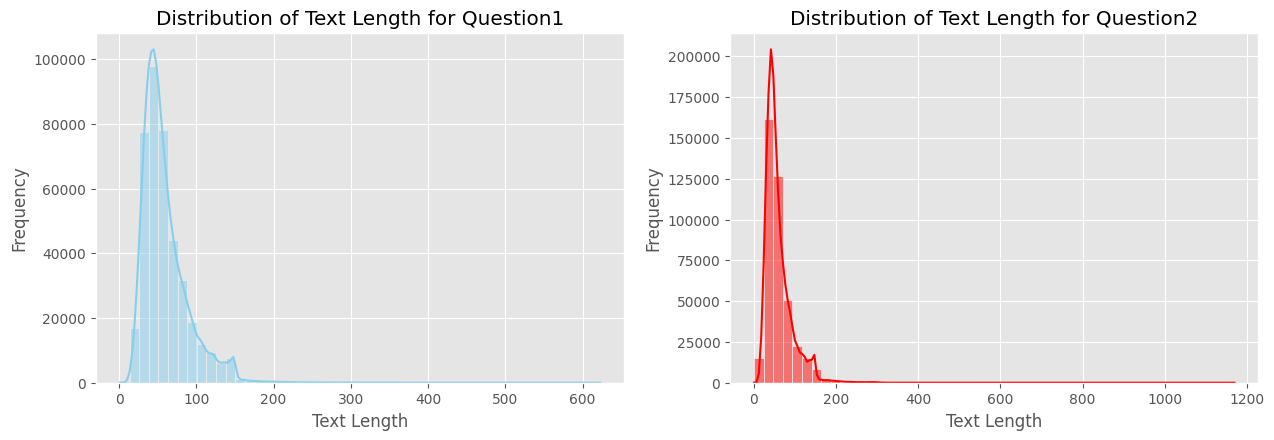

In [ ]:
# Text length distribution for question1
plt.figure(figsize=(15 ,10))
plt.subplot(2,2,1)
sns.histplot(data=Quora, x=Quora['question1'].astype('str').apply(len), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length for Question1')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
# Text length distribution for question2
plt.subplot(2,2,2)
sns.histplot(data=Quora, x=Quora['question2'].astype('str').apply(len), bins=50, kde=True, color='red')
plt.title('Distribution of Text Length for Question2')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

- In examining the KDE plot for the lengths of 'question1' and 'question2', a striking similarity emerges in the distribution, with both ranging from 0 to 150 and 0 to 180, respectively.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams_q1 = vectorizer.fit_transform(Quora['question1'])

# Get feature names (bigrams)
feature_names = vectorizer.get_feature_names_out()

top_bigrams = pd.DataFrame(bigrams_q1.sum(axis=0).tolist()[0], index=feature_names, columns=['Count'])
top_bigrams_q1 = top_bigrams.sort_values(by='Count', ascending=False).head(20)
bigrams_q2 = vectorizer.fit_transform(Quora['question2'])
feature_names = vectorizer.get_feature_names_out()
top_bigrams = pd.DataFrame(bigrams_q2.sum(axis=0).tolist()[0], index=feature_names, columns=['Count'])
top_bigrams_q2 = top_bigrams.sort_values(by='Count', ascending=False).head(20)

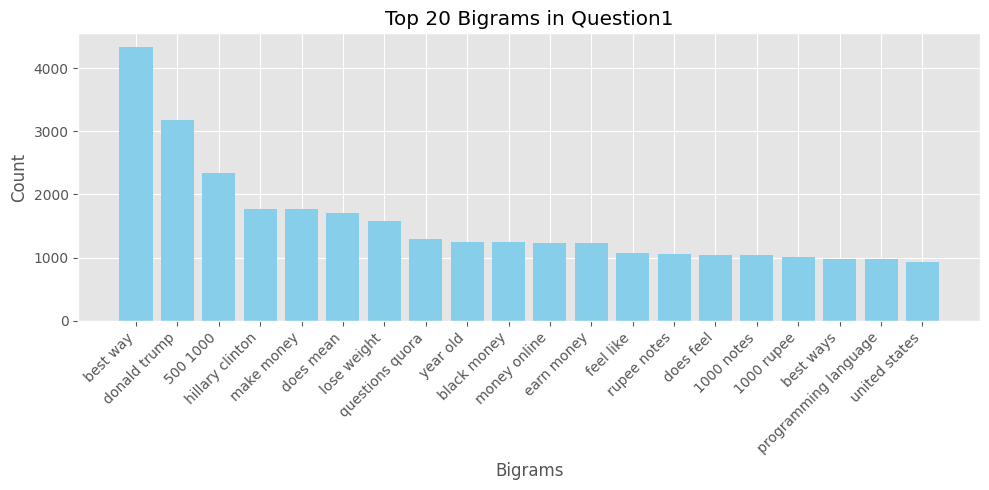

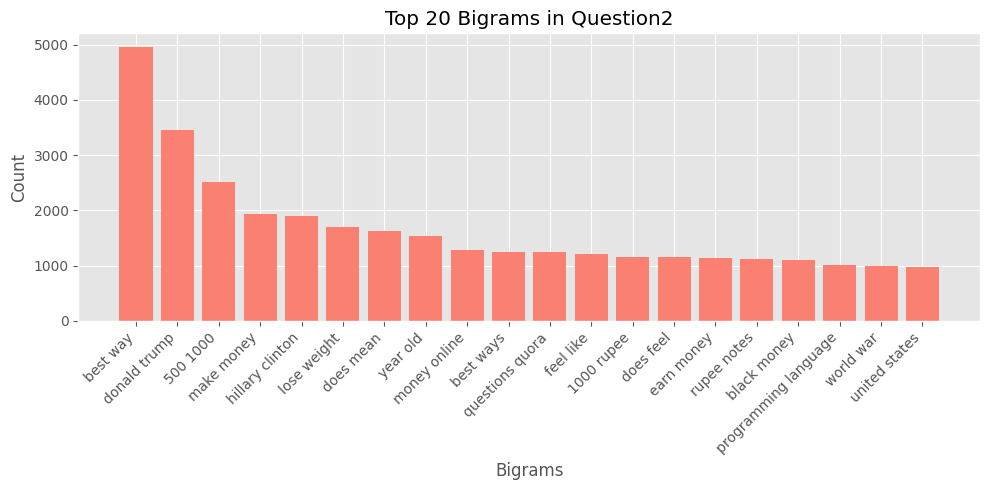

In [ ]:
# Set the style for the plots
plt.style.use('ggplot')

# Plot histograms for top bigrams in question1
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_q1.index, top_bigrams_q1['Count'], color='skyblue')
plt.title('Top 20 Bigrams in Question1')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot histograms for top bigrams in question2
plt.figure(figsize=(10,5))
plt.bar(top_bigrams_q2.index, top_bigrams_q2['Count'], color='salmon')
plt.title('Top 20 Bigrams in Question2')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- In exploring the top 20 bigrams in question1 and question2, a remarkable consistency emerges with the presence of the same 5 bigrams appearing in identical order.
- Not only underscores a high degree of textual similarity but also provides valuable insights into the recurring language patterns within the dataset.